**Progetto di Programmazione di Applicazioni Data Intensive**

Mattia Mencaccini   
Filippo Badioli  
Lorenzo Morri  

# Introduzione

L'obiettivo di questo progetto è riuscire a prevedere se una mail sia SPAM o meno, analizzando le sue caratteristiche di contenuto e struttura.
Per svolgerlo utilizzeremo un dataset, recuperato da kaggle, dove ogni istanza rappresenta un email.
Il problema posto è quello di una classificazione binaria.

# Caricamento e preparazione del dataset

Vengono importate le librerie necessarie per scaricare i file, organizzare le strutture dati e disegnare i grafici.

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Caricamento dei dati e preprocessing**

In [2]:
dataset = pd.read_csv("spambase_updated.csv")


Cambiamo il tipo di dato di spam: si tratta di un valore booleano (0,1) e non int64.

Il resto dei tipi sembra essere coerente con il tipo di dato rappresentato.

In [3]:
dataset["spam"] = dataset["spam"].astype(bool)
dataset["spam"].dtype #controllo cambio 

dtype('bool')

In [4]:
data_training = dataset.iloc[:int(len(dataset)*0.8)]#80% per training
data_validation = dataset.iloc[int(len(dataset)*0.8):int(len(dataset)*0.9)]#10% validation
data_test = dataset.iloc[int(len(dataset)*0.9):]#10% test
data_training

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.000,0.000,0.000,1.000,1,5,False
3676,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.000,0.000,0.000,1.142,2,8,False
3677,0.00,0.00,0.00,0.0,0.44,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.000,0.000,0.000,3.901,33,398,False
3678,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.000,0.000,0.000,1.000,1,3,False


Di seguito sono riportate le dimensioni in memoria, il numero di istanze non nulle, il tipo delle feature che compongono i dati raccolti nel dataset (training set) e le statistiche descrittive.

In [5]:
data_training.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3680 non-null   float64
 1   word_freq_address           3680 non-null   float64
 2   word_freq_all               3680 non-null   float64
 3   word_freq_3d                3680 non-null   float64
 4   word_freq_our               3680 non-null   float64
 5   word_freq_over              3680 non-null   float64
 6   word_freq_remove            3680 non-null   float64
 7   word_freq_internet          3680 non-null   float64
 8   word_freq_order             3680 non-null   float64
 9   word_freq_mail              3680 non-null   float64
 10  word_freq_receive           3680 non-null   float64
 11  word_freq_will              3680 non-null   float64
 12  word_freq_people            3680 non-null   float64
 13  word_freq_report            3680 

Controlliamo che non ci siano dati mancanti:

In [6]:
data_training.isna().any().sum()

0

Non ci sono dati mancanti.

Controlliamo se ci sono righe duplicate, e in caso le eliminiamo:

In [7]:
print("Elementi duplicati: ", data_training.duplicated().sum())
data_training = data_training.drop_duplicates()
print("Elementi duplicati dopo rimozione: ", data_training.duplicated().sum())

Elementi duplicati:  354
Elementi duplicati dopo rimozione:  0


**Significato delle feature**

Colonne delle funzionalità del contenuto del set di dati:
- **word_freq_RD**  
  Frequenza di una parola specifica nell'email (percentuale delle parole totali)

- **char_frHAR**  
  Frequenza di un carattere specifico (ad esempio, `;`, `(`, `[`, `#`) nell'eml.

- **capital_run_lengaverage**  
  Lunghezza media delle sequenze di lettere maiuscole consetive.

- **capital_run_lgth_longest**  
  Lunghezza della sequenza più lunga di lettere maiuscole coecutive.

- **capital_n_length_total**  
  Numero totale di lettere maiuscolnellail.

- **spam**  
  Indica se il messaggio email è spam (`1`: Spam, `0`: Ham).
0: Ham).

In [8]:
data_training.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,...,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000
mean,0.110481,0.122294,0.298545,0.079750,0.370126,0.102952,0.148052,0.124477,0.110761,0.259811,...,0.032129,0.026306,0.142839,0.018012,0.298186,0.092552,0.054129,6.228028,61.507517,335.044498
std,0.288136,0.457175,0.502793,1.521247,0.713705,0.262311,0.441636,0.419950,0.308592,0.647939,...,0.296002,0.104493,0.274091,0.111161,0.600160,0.264697,0.488296,37.239347,223.342542,678.078174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000,9.000000,47.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.075000,0.000000,0.056000,0.000000,0.000000,2.485000,18.000000,121.000000
75%,0.050000,0.000000,0.470000,0.000000,0.510000,0.000000,0.000000,0.000000,0.000000,0.270000,...,0.000000,0.000000,0.192000,0.000000,0.387000,0.099000,0.000000,4.028250,51.000000,329.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,2.940000,7.270000,11.110000,5.260000,18.180000,...,10.000000,2.053000,9.752000,4.081000,7.843000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


## ANALISI ESPLORATIVA (EDA)

Analizziamo nello specifico la frequenza di mail spam:

<Axes: title={'center': 'Mail Spam'}>

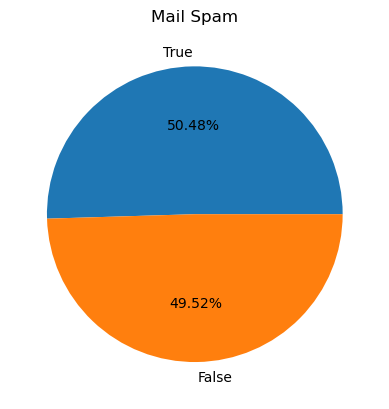

In [9]:
plt.title("Mail Spam")
data_training["spam"].value_counts().plot.pie(autopct="%.2f%%", ylabel="")

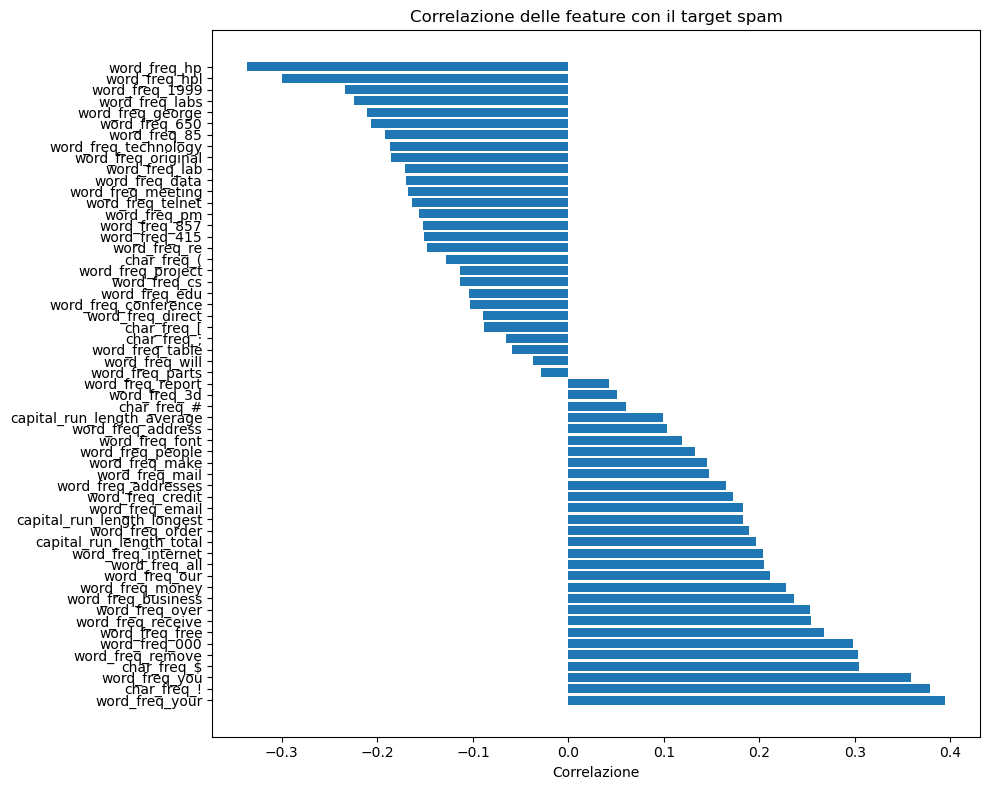

In [16]:
corr_target = data_training.corr()["spam"].drop("spam").sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(corr_target.index, corr_target.values)
plt.title("Correlazione delle feature con il target spam")
plt.xlabel("Correlazione")
plt.tight_layout()
plt.show()


Analizziamo i dati non spam

In [10]:
data_no_spam = data_training[data_training["spam"]==0].drop(columns=["spam"])#sono tutte non spam
data_no_spam.mean().sort_values(ascending=False).head()

capital_run_length_total      200.390407
capital_run_length_longest     20.188828
capital_run_length_average      2.514024
word_freq_hp                    1.199174
word_freq_you                   1.049192
dtype: float64

Ora filtriamo il dataset e recuperiamo solo le mail spam per analizzare le possibili relazioni con i dati.

In [11]:
data_spam = data_training[data_training["spam"]==1].drop(columns=["spam"])#sono tutte spam
data_spam.mean().sort_values(ascending=False).head()

capital_run_length_total      467.132222
capital_run_length_longest    102.038714
capital_run_length_average      9.871248
word_freq_you                   2.274771
word_freq_your                  1.366522
dtype: float64

Otteniamo differenza relativa per vedere quali parole sono più presenti nelle mail spam.

In [12]:
data_diff=((data_spam.mean() - data_no_spam.mean())/data_no_spam.mean()).sort_values(ascending=False)
data_diff.head(10)

word_freq_font         892.052894
word_freq_3d           118.479527
word_freq_credit        31.785056
word_freq_000           27.609838
word_freq_money         23.593226
word_freq_remove        20.696758
char_freq_$             14.115925
word_freq_addresses      8.420193
word_freq_free           7.348184
char_freq_!              6.604475
dtype: float64

<Axes: >

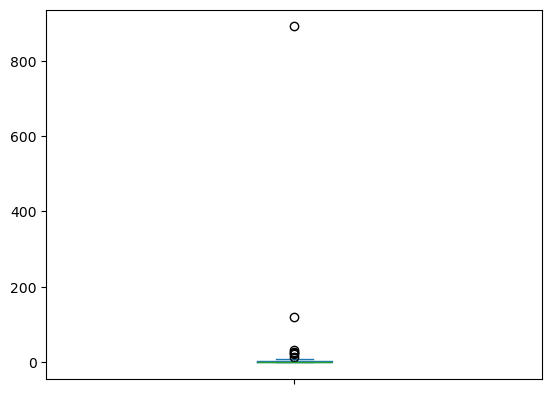

In [13]:
data_diff.plot.box()

Recuperiamo dati estremamente significativi

In [14]:
Q1 = data_diff.quantile(0.25)
Q3 = data_diff.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (data_diff < Q1 - 1.5 * IQR) | (data_diff > Q3 + 1.5 * IQR)
data_outlier = data_diff[outlier_mask]
data_outlier

word_freq_font      892.052894
word_freq_3d        118.479527
word_freq_credit     31.785056
word_freq_000        27.609838
word_freq_money      23.593226
word_freq_remove     20.696758
char_freq_$          14.115925
dtype: float64

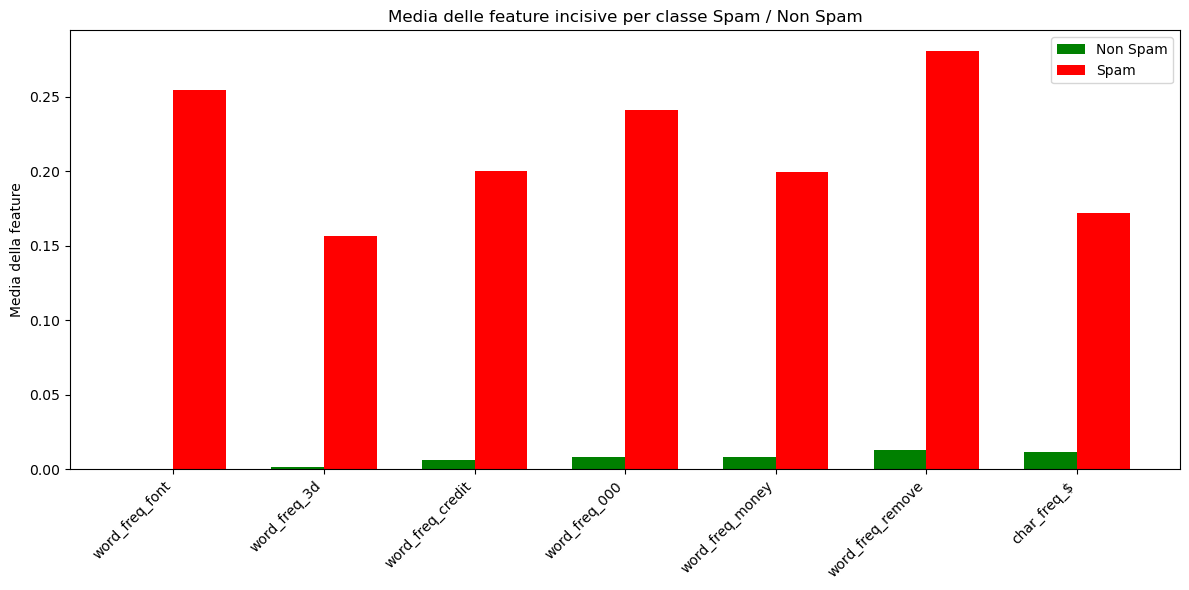

In [15]:
colonne_significative = data_diff[outlier_mask].index.tolist()

# Calcola la media delle feature per spam=0 e spam=1
media_non_spam = data_training[data_training["spam"] == 0][colonne_significative].mean()
media_spam = data_training[data_training["spam"] == 1][colonne_significative].mean()

# Crea il grafico
x = np.arange(len(colonne_significative))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, media_non_spam, width, label='Non Spam', color='green')
plt.bar(x + width/2, media_spam, width, label='Spam', color='red')

plt.xticks(x, colonne_significative, rotation=45, ha='right')
plt.ylabel('Media della feature')
plt.title('Media delle feature incisive per classe Spam / Non Spam')
plt.legend()
plt.tight_layout()
plt.show()
